* ML11 サンプルプログラム テンプレートマッチング

In [ ]:
# 実験で利用する画像ファイルをダウンロードする
#!wget https://github.com/KHiraGit/sudspg_ds/raw/main/ml11_trump_s5c6.jpg
#!wget https://github.com/KHiraGit/sudspg_ds/raw/main/ml11_trump_template_s3.jpg

size of template image 385 285
size of target image (814, 960)


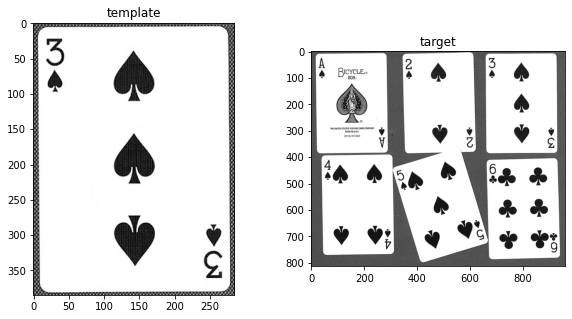

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 実験対象とする画像ファイルを指定
template_file = "ml11_trump_template_s3.jpg"
image_file = "ml11_trump_s5c6.jpg"

# テンプレート画像をグレー画像で読み込み、サイズを取得
template = cv2.imread(template_file, 0)
w, h = template.shape
print('size of template image', w, h)
# 対象画像をグレースケールで読み込む
target = cv2.imread(image_file, 0)
print('size of target image', target.shape)

# 各画像を表示
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_title('template')
ax[0].imshow(template,cmap='gray')
ax[1].set_title('target')
ax[1].imshow(target,cmap='gray')
plt.show()

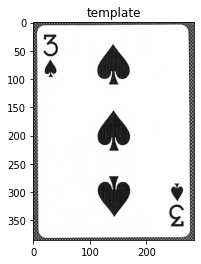

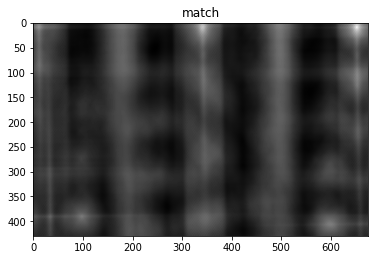

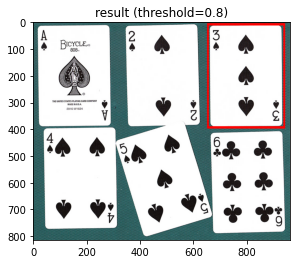

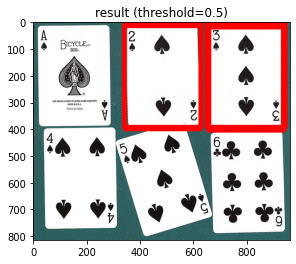

In [32]:
#　マッチングテンプレートを実行 (opencvの関数を利用)
match = cv2.matchTemplate(target, template, cv2.TM_CCOEFF_NORMED)

# 閾値を変えて結果表示 #
plt.title('template')
plt.imshow(template,cmap='gray')
plt.show()
plt.title(f'match')
plt.imshow(match,cmap='gray')
plt.show()

i = 0
for th in [0.8, 0.5]:
    #　類似度の設定(0~1)し、検出結果から設定値以上の検出領域の位置を取得
    threshold = th
    loc = np.where(match >= threshold)

    #　対象画像をカラースケールで読み込み、検出領域を赤枠で囲む
    result = cv2.imread(image_file)
    result = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)   
    for top_left in zip(*loc[::-1]):
        bottom_right = (top_left[0] + h, top_left[1] + w)
        cv2.rectangle(result, top_left, bottom_right, (255, 0, 0), 2)

    plt.title(f'result (threshold={th})')
    plt.imshow(result)
    plt.show()
    i = i + 1
